# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



Vivendo is a fast food chain in Brazil with over 200 outlets.
Customers often claim compensation from the company for food poisoning.
The legal team processes these claims. The legal team has offices in four locations.
The legal team wants to improve how long it takes to reply to customers and close claims.
The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

# Task 1: Data Exploring

Python language was used to analyse this dataset. The dataset contains **2000 rows and 8 columns**, I have validate these against the criteria in dataset:
- **claim_id:** Nominal. The unique identifier of the claim. 2000 non-null values.
- **time_to_close:** Discrete. The number of days to close the claim. Any positive value. 2000 non-null values.
- **claim_amount:** Continuous. The initial claim requested in the currency of Brazil, rounded to 2 decimal places. 2000 non-null values. **Currency symbol needs to be remove for better analysis.**
- **amount_paid:** Continuous. Final amount paid. In the currency of Brazil. Rounded to 2 decimal places. 1964 non-null values and 36 missing values so I replaced the missing values with overall median number.
- **location:** Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”. 2000 non-null values. 
- **individuals_on_claim:** Discrete. Number of individuals on this claim. Minimum 1 person. 2000 non-null values   int64  
- **linked_cases: Nominal.** Whether this claim is linked to other cases. Either TRUE or FALSE. 1974 non-null values and 26 missing values so I replaced the missing values with FALSE. 
- **cause:** Nominal. Cause of the food poisoning. 2000 non-null values. Some values needed to be fixed in order to fit into categories 'meat','vegetable' or 'unknow'

After the data validation, the dataset contains **200 rows and 9 columns**.

In [52]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
#Data Validation
df = pd.read_csv('food_claims_2212.csv')
df.head(10)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
5,6,183,R$ 47529.14,38011.98,NATAL,11,False,unknown
6,7,190,R$ 39073.26,29826.04,SAO LUIS,12,False,meat
7,8,183,R$ 29870.56,29727.52,SAO LUIS,8,True,unknown
8,9,149,R$ 26644.46,23362.14,RECIFE,9,False,meat
9,10,149,R$ 11544.68,9680.82,NATAL,6,False,vegetable


In [54]:
#Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [55]:
#Validating categorical variables
categorical = ['location','linked_cases','cause']
for column in categorical:
  print(df[column].value_counts())

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64
False    1493
True      481
Name: linked_cases, dtype: int64
meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64


In [56]:
#Fixing categorical variable 'cause'
df['cause']=df['cause'].replace({' Meat':'meat','Meat':'meat','VEGETABLES':'vegetable'})
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [57]:
#Validating categorical variables
categorical = ['location','linked_cases','cause']
for column in categorical:
  print(df[column].value_counts())

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64
False    1493
True      481
Name: linked_cases, dtype: int64
meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64


In [58]:
#Replacing null values 'amount_paid' variable
df['amount_paid']=df['amount_paid'].fillna(np.median(df['amount_paid'].dropna()))
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [59]:
#Replacing null values 'linked_cases' variable
df['linked_cases']=df['linked_cases'].fillna('False')
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [60]:
#Revalidating null values
df.isna().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [61]:
#Removing currency symbol
df['claim_amount'] = df['claim_amount'].replace({'R': ''}, regex=True)
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,$ 23516.28,23310.24,RECIFE,9,False,meat


In [62]:
df['claim_amount'] = df['claim_amount'].str.replace('$','').astype(float)
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


In [63]:
#Validating numerical data
df.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,185.56800,27156.965235,21516.122230,8.049500
std,577.494589,49.16339,16195.783099,12418.285043,4.087347
min,1.000000,76.00000,1637.940000,1516.720000,1.000000
25%,500.750000,158.00000,13758.952500,11106.652500,4.000000
50%,1000.500000,179.00000,24821.085000,20105.700000,8.000000
75%,1500.250000,204.00000,38581.350000,30472.895000,12.000000
max,2000.000000,518.00000,76106.800000,52498.750000,15.000000


# Task 2: Count of Locations

**'Graph 1: Count of Location'** shows that the most number of claims were from Recife (800+) follows by Sao Luis with around 500+, then Fortaleza and Natal has the almost the same count of observations, being Natal the city that has the less number of observations.

[Text(0.5, 1.0, 'Graph 1: Count of Location')]

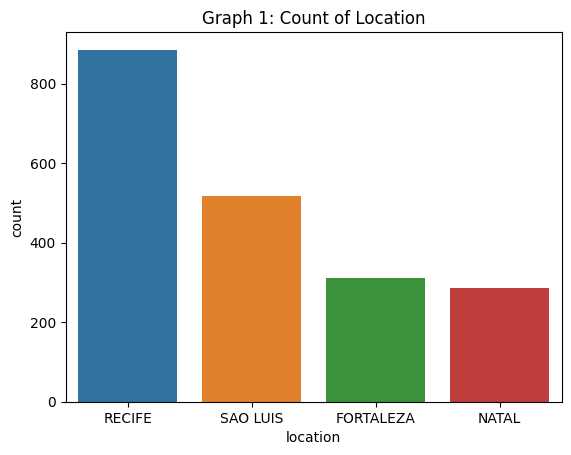

In [64]:
sns.countplot(x=df['location'], order = df['location'].value_counts().index).set(title='Graph 1: Count of Location')

# Task 3: Distribution of time_to_close variable

The variable 'time_to_close' according to **Graph 3 Distribution of 'time_to_close'** it's closer to a normal distribution, aplying _log _transformation_ this can be confirmed as it shows in **Graph 3 Distribution of log('time_to_close')**

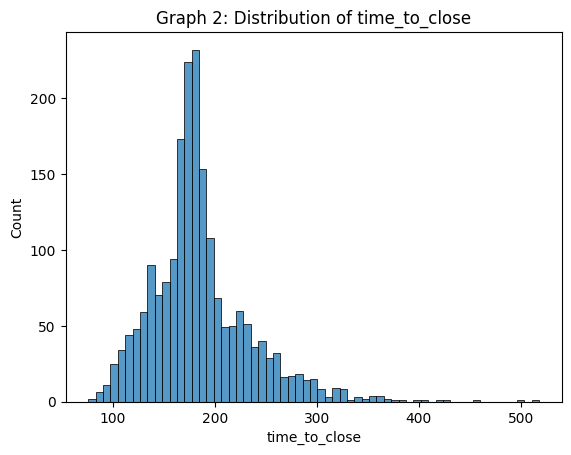

In [65]:
sns.histplot(x=df['time_to_close']).set(title='Graph 2: Distribution of time_to_close');

[Text(0.5, 1.0, "Graph 3 Distribution of log('time_to_close')")]

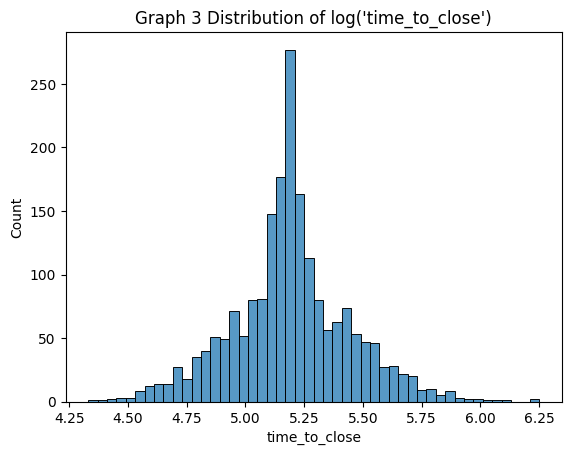

In [66]:
sns.histplot(x=np.log(df['time_to_close'])).set(title="Graph 3 Distribution of log('time_to_close')")

# Task 4: Relationship between time_to_close and location

From Grahp 4.1 with the outliers removed allows us to interpet that the time_to_close variable have almost the same interquartile range and median in all study cities.

[Text(0.5, 1.0, "Graph 4 Boxplot between 'time_to_close' and 'location'")]

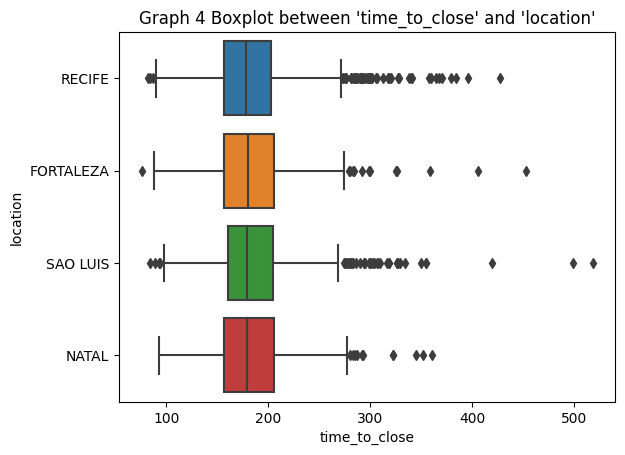

In [71]:
sns.boxplot(y=df['location'],x=df['time_to_close']).set(title="Graph 4 Boxplot between 'time_to_close' and 'location'")

In [68]:
df['time_to_close'].describe()

count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam